In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("E:\Project datasets\Credit card transactions - India - Simple.csv")
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574


In [49]:
# split city into two different column
#                                             this 1 is the number of times we want to split
df[["State","Country"]] = df["City"].str.split(',',1, expand = True)

C:\Users\Malik\AppData\Local\Temp\ipykernel_15776\4122698976.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["State","Country"]] = df["City"].str.split(',',1, expand = True)


In [50]:
df.drop_duplicates().head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,State,Country
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475,Delhi,India
1,1,"Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,Mumbai,India
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,Bengaluru,India
3,3,"Mumbai, India",12-Apr-14,Signature,Bills,F,123424,Mumbai,India
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574,Bengaluru,India


In [51]:
df.dropna().head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,State,Country
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475,Delhi,India
1,1,"Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,Mumbai,India
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,Bengaluru,India
3,3,"Mumbai, India",12-Apr-14,Signature,Bills,F,123424,Mumbai,India
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574,Bengaluru,India


In [53]:
df.drop(columns = "City", inplace = True)

In [55]:
df.drop(columns = "index", inplace = True)

In [56]:
df.head()

,Date,Card Type,Exp Type,Gender,Amount,State,Country
0,29-Oct-14,Gold,Bills,F,82475,Delhi,India
1,22-Aug-14,Platinum,Bills,F,32555,Mumbai,India
2,27-Aug-14,Silver,Bills,F,101738,Bengaluru,India
3,12-Apr-14,Signature,Bills,F,123424,Mumbai,India
4,05-May-15,Gold,Bills,F,171574,Bengaluru,India


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       26052 non-null  object
 1   Card Type  26052 non-null  object
 2   Exp Type   26052 non-null  object
 3   Gender     26052 non-null  object
 4   Amount     26052 non-null  int64 
 5   State      26052 non-null  object
 6   Country    26052 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.4+ MB


In [58]:
df["Date"] = pd.to_datetime(df["Date"])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       26052 non-null  datetime64[ns]
 1   Card Type  26052 non-null  object        
 2   Exp Type   26052 non-null  object        
 3   Gender     26052 non-null  object        
 4   Amount     26052 non-null  int64         
 5   State      26052 non-null  object        
 6   Country    26052 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.4+ MB


In [60]:
abc = df[["State", "Amount"]]
group_1 = abc.groupby("State").sum().sort_values(by = 'Amount', ascending = False)
group_1

,Amount
State,
Mumbai,578041792
Bengaluru,572326739
Ahmedabad,567794310
Delhi,557189421
Kolkata,115466943
...,...
Changanassery,30074
Tirur,26094
Bahraich,24253


## States with highest and lowest spendings


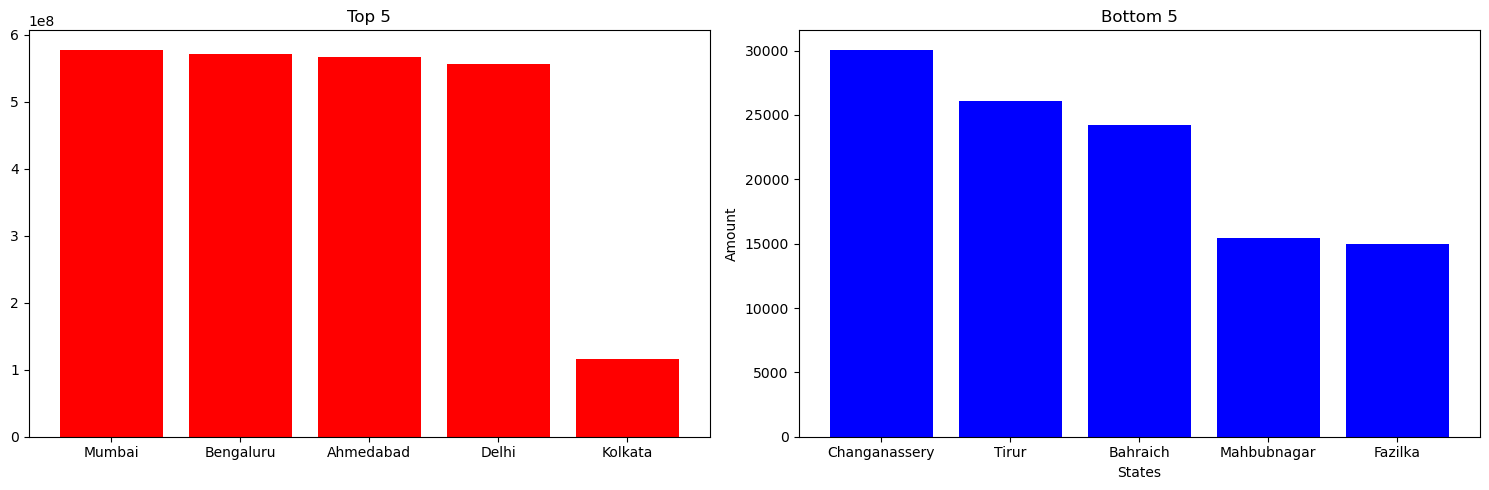

In [61]:
abc = df[["State", "Amount"]]
group_1 = abc.groupby("State").sum().sort_values(by = 'Amount', ascending = False)

top_5 = group_1.head()
bottom_5 = group_1.tail()

plt.figure(figsize = (15,5))

plt.subplot(121)
plt.bar(top_5.index, top_5['Amount'], color = 'red')
plt.title('Top 5')

plt.subplot(122)
plt.bar(bottom_5.index, bottom_5['Amount'], color = 'blue')
plt.title('Bottom 5')

plt.xlabel('States')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [62]:
df.head()

,Date,Card Type,Exp Type,Gender,Amount,State,Country
0,2014-10-29,Gold,Bills,F,82475,Delhi,India
1,2014-08-22,Platinum,Bills,F,32555,Mumbai,India
2,2014-08-27,Silver,Bills,F,101738,Bengaluru,India
3,2014-04-12,Signature,Bills,F,123424,Mumbai,India
4,2015-05-05,Gold,Bills,F,171574,Bengaluru,India


## Most common expense type

In [63]:
expense = df[["Exp Type", "Amount"]]

group_2 = expense.groupby("Exp Type").sum().sort_values(by = 'Amount', ascending = False).reset_index()
group_2

,Exp Type,Amount
0,Bills,907072473
1,Food,824724009
2,Fuel,789135821
3,Entertainment,726437536
4,Grocery,718207923
5,Travel,109255611


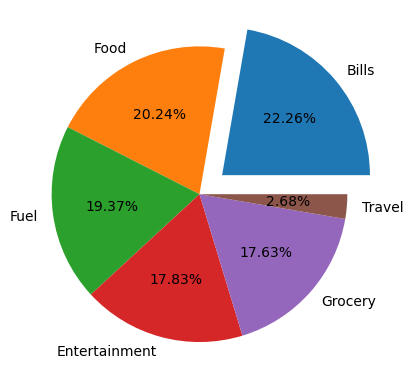

In [64]:
plt.pie(group_2['Amount'], labels = group_2['Exp Type'], autopct = '%2.2f%%', explode = [0.2,0,0,0,0,0])
plt.show()

In [65]:
df.head()

,Date,Card Type,Exp Type,Gender,Amount,State,Country
0,2014-10-29,Gold,Bills,F,82475,Delhi,India
1,2014-08-22,Platinum,Bills,F,32555,Mumbai,India
2,2014-08-27,Silver,Bills,F,101738,Bengaluru,India
3,2014-04-12,Signature,Bills,F,123424,Mumbai,India
4,2015-05-05,Gold,Bills,F,171574,Bengaluru,India


## Gender Spending Disparities

In [66]:
gen_gp = df[['Gender', 'Amount']]

gender_group = gen_gp.groupby('Gender').mean()

gender_group

,Amount
Gender,
F,161206.946637
M,151109.145086


## Revenue collected per year

In [68]:
data2 = df

In [69]:
data2['Year'] = data2['Date'].dt.year
data2.head()

,Date,Card Type,Exp Type,Gender,Amount,State,Country,Year
0,2014-10-29,Gold,Bills,F,82475,Delhi,India,2014
1,2014-08-22,Platinum,Bills,F,32555,Mumbai,India,2014
2,2014-08-27,Silver,Bills,F,101738,Bengaluru,India,2014
3,2014-04-12,Signature,Bills,F,123424,Mumbai,India,2014
4,2015-05-05,Gold,Bills,F,171574,Bengaluru,India,2015


In [70]:
data2.groupby('Year').sum()

C:\Users\Malik\AppData\Local\Temp\ipykernel_15776\868156595.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2.groupby('Year').sum()


,Amount
Year,
2013,613643884
2014,2454714033
2015,1006475456
